# Курсовая работа ТМО

# Задание

1. Поиск и выбор набора данных для построения моделей машинного обучения. На основе выбранного набора данных студент должен построить модели машинного обучения для решения или задачи классификации, или задачи регрессии.
2. Проведение разведочного анализа данных. Построение графиков, необходимых для понимания структуры данных. Анализ и заполнение пропусков в данных.
3. Выбор признаков, подходящих для построения моделей. Кодирование категориальных признаков. Масштабирование данных. Формирование вспомогательных признаков, улучшающих качество моделей.
4. Проведение корреляционного анализа данных. Формирование промежуточных выводов о возможности построения моделей машинного обучения. В зависимости от набора данных, порядок выполнения пунктов 2, 3, 4 может быть изменен.
5. Выбор метрик для последующей оценки качества моделей. Необходимо выбрать не менее трех метрик и обосновать выбор.
6. Выбор наиболее подходящих моделей для решения задачи классификации или регрессии. Необходимо использовать не менее пяти моделей, две из которых должны быть ансамблевыми.
7. Формирование обучающей и тестовой выборок на основе исходного набора данных.
8. Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров. Производится обучение моделей на основе обучающей выборки и оценка качества моделей на основе тестовой выборки.
9. Подбор гиперпараметров для выбранных моделей. Рекомендуется использовать методы кросс-валидации. В зависимости от используемой библиотеки можно применять функцию GridSearchCV, использовать перебор параметров в цикле, или использовать другие методы.
10. Повторение пункта 8 для найденных оптимальных значений гиперпараметров. Сравнение качества полученных моделей с качеством baseline-моделей.
11. Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. Рекомендуется построение графиков обучения и валидации, влияния значений гиперпарметров на качество моделей и т.д.

# Ход выполнения курсовой работы

### В качестве набора данных мы будем использовать набор данных по играм в цифровом дистрибьюторе Steam

Файл содержит следующие колонки:
1. appid - айди игры в магазине
2. name - название
3. release_date дату - выпуска игры
4. english           -   присутсвует ли в игре английский язык
5. publisher        -    компании издатели
6. platforms         -   платформы, на которых была выпущена игра
7. required_age      -   возрастное ограничение
8. categories       -    синглплеер/мультиплеер
9. genres            -   жанр
10. steamspy_tags     -   тэги в магазине Steam
11. achievements       -  общее количество достижений
12. positive_ratings   -  кол-во позитивных оценок
13. negative_ratings   -  кол-во негативных оценок
14. average_playtime   -  общее время в игре
15. median_playtime    -  медианное время в игре
16. owners             -  число покупок игры
17. price              -  цена

### Импортируем необходимые библиотеки

In [2]:
import itertools
import re

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

%matplotlib inline
sns.set(style="ticks")

# Для лучшего качествоа графиков
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

# Устанавливаем ширину экрана для отчета
pd.set_option("display.width", 70)

# Загружаем данные
data = pd.read_csv('steam.csv')
data.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


### Исследуем набор данных

In [3]:
data.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

Пропусков нет 

In [4]:
data.shape

(27075, 18)

In [5]:
data.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


In [6]:
data.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms            object
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
owners               object
price               float64
dtype: object

### Закодируем категориальные признаки и изменим структуру таблицы для более удобного анализа

In [7]:
data['genres'].value_counts()

Action;Indie                                                                 1852
Casual;Indie                                                                 1482
Action;Adventure;Indie                                                       1229
Adventure;Indie                                                              1170
Action;Casual;Indie                                                          1004
                                                                             ... 
Action;Adventure;Casual;Indie;Massively Multiplayer;Simulation;Strategy         1
Action;Casual;Indie;Massively Multiplayer;Racing                                1
Free to Play;Early Access                                                       1
Casual;Indie;Simulation;Education                                               1
Action;Adventure;Casual;Indie;Racing;RPG;Simulation;Strategy;Early Access       1
Name: genres, Length: 1552, dtype: int64

In [8]:
def get_unique(series):
    return set(list(itertools.chain(*series.apply(lambda x: [c for c in x.split(';')]))))

def process_cat_gen_tag(df):
    cat_cols = get_unique(df['categories'])
    
    cat_cols = [
        'Multi-player',
        'Single-player'
    ]
    
    for col in sorted(cat_cols):
        col_name = re.sub(r'[\s\-\/]', '_', col.lower())
        col_name = re.sub(r'[()]', '', col_name)
        
        df[col_name] = df['categories'].apply(lambda x: 1 if col in x.split(';') else 0)
        
    gen_cols = get_unique(df['genres'])
    
    gen_cols = [
        'Action',
        'Adventure',
        'Casual',
        'Free to Play',
        'Indie',
        'Massively Multiplayer',
        'RPG',
        'Racing',
        'Sexual Content',
        'Simulation',
        'Sports',
        'Strategy'
        'Violent',
    ]
    
    gen_col_names = []
    
    for col in sorted(gen_cols):
        col_name = col.lower().replace('&', 'and').replace(' ', '_')
        gen_col_names.append(col_name)
        
        df[col_name] = df['genres'].apply(lambda x: 1 if col in x.split(';') else 0)
    
    gen_sums = df[gen_col_names].sum(axis=1)
    df = df[gen_sums > 0]
        
    tag_cols = get_unique(df['steamspy_tags'])
    
    df = df.drop(['categories', 'genres', 'steamspy_tags'], axis=1)
    
    return df

# Среднее количество владельцев
data['owners'] = data['owners'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2).astype(int)
data = process_cat_gen_tag(data)

In [9]:
le1 = LabelEncoder()
data['developer'] = le1.fit_transform(data['developer']);

In [10]:
le2 = LabelEncoder()
data['name'] = le2.fit_transform(data['name']);

In [11]:
data['owners'].value_counts()

10000        18199
35000         2965
75000         1629
150000        1336
350000        1231
750000         482
1500000        263
3500000        183
7500000         43
15000000        21
35000000         3
75000000         2
150000000        1
Name: owners, dtype: int64

### Датасет готов к анализу

In [ ]:
data.head()

In [12]:
data.dtypes

appid                      int64
name                       int64
release_date              object
english                    int64
developer                  int64
publisher                 object
platforms                 object
required_age               int64
achievements               int64
positive_ratings           int64
negative_ratings           int64
average_playtime           int64
median_playtime            int64
owners                     int64
price                    float64
multi_player               int64
single_player              int64
action                     int64
adventure                  int64
casual                     int64
free_to_play               int64
indie                      int64
massively_multiplayer      int64
rpg                        int64
racing                     int64
sexual_content             int64
simulation                 int64
sports                     int64
strategyviolent            int64
dtype: object

In [13]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

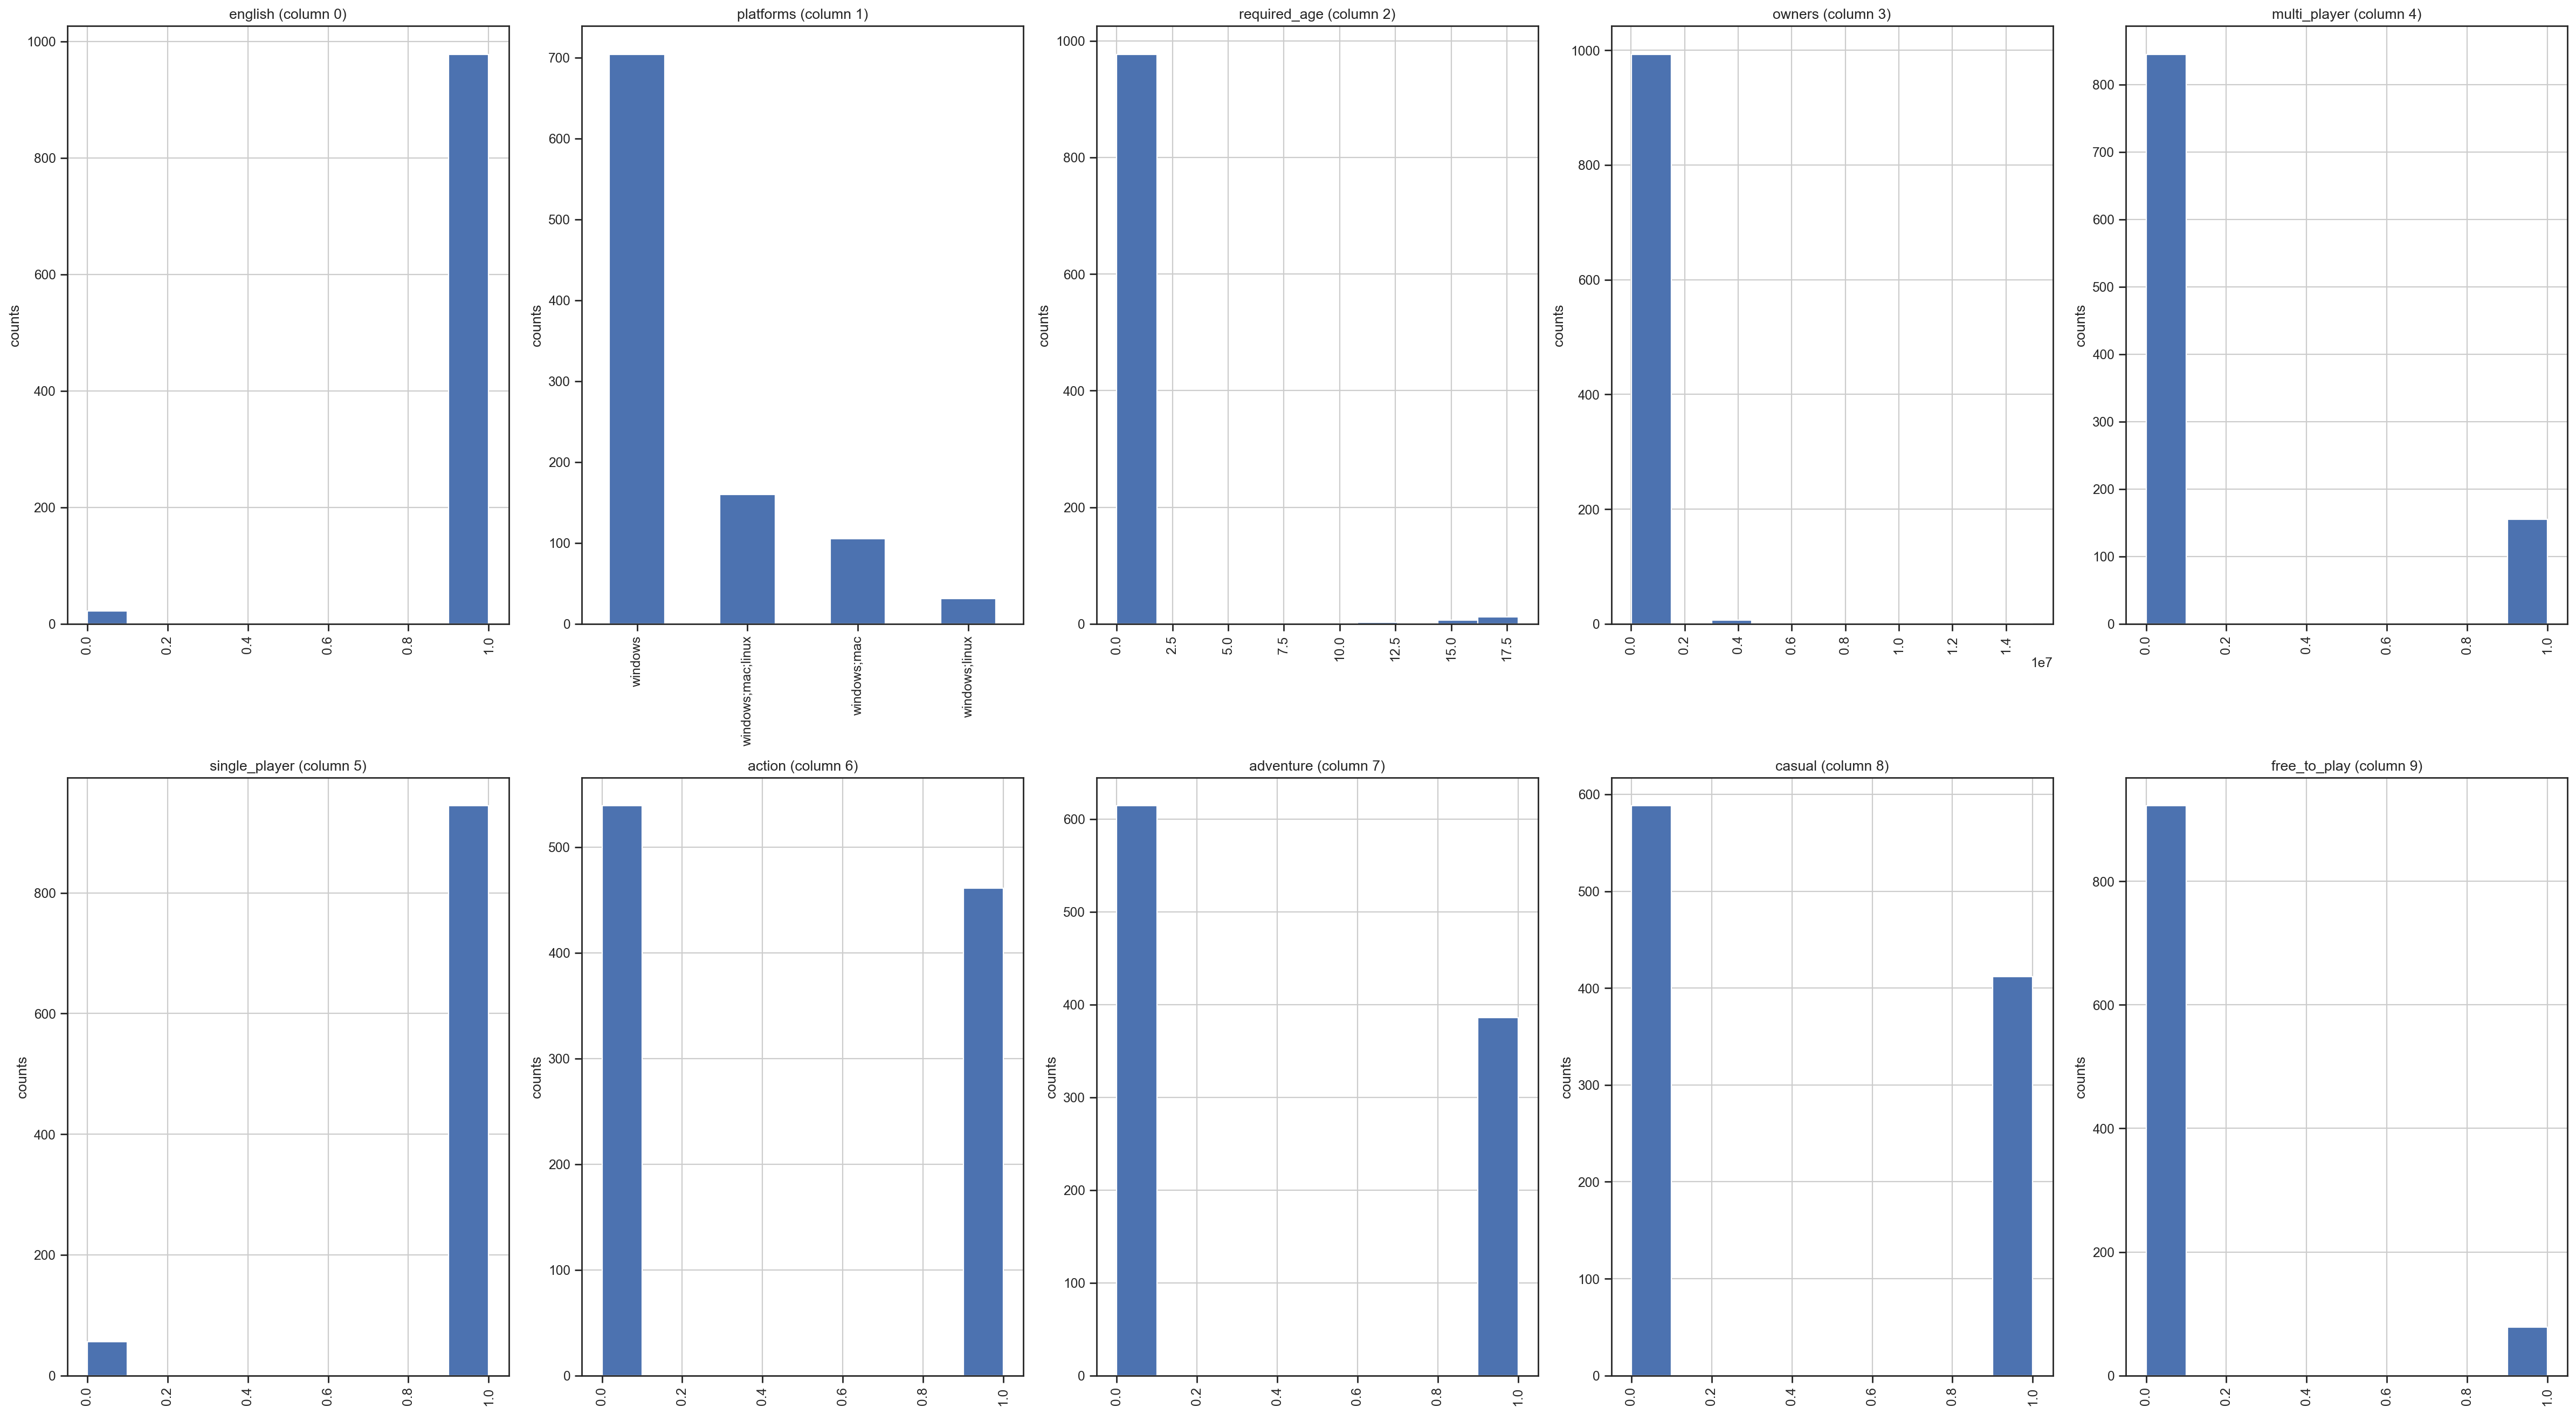

In [14]:
dfsample = data.sample(1000)
dfsample.dataframeName = 'steam'
plotPerColumnDistribution(dfsample, 10, 5)

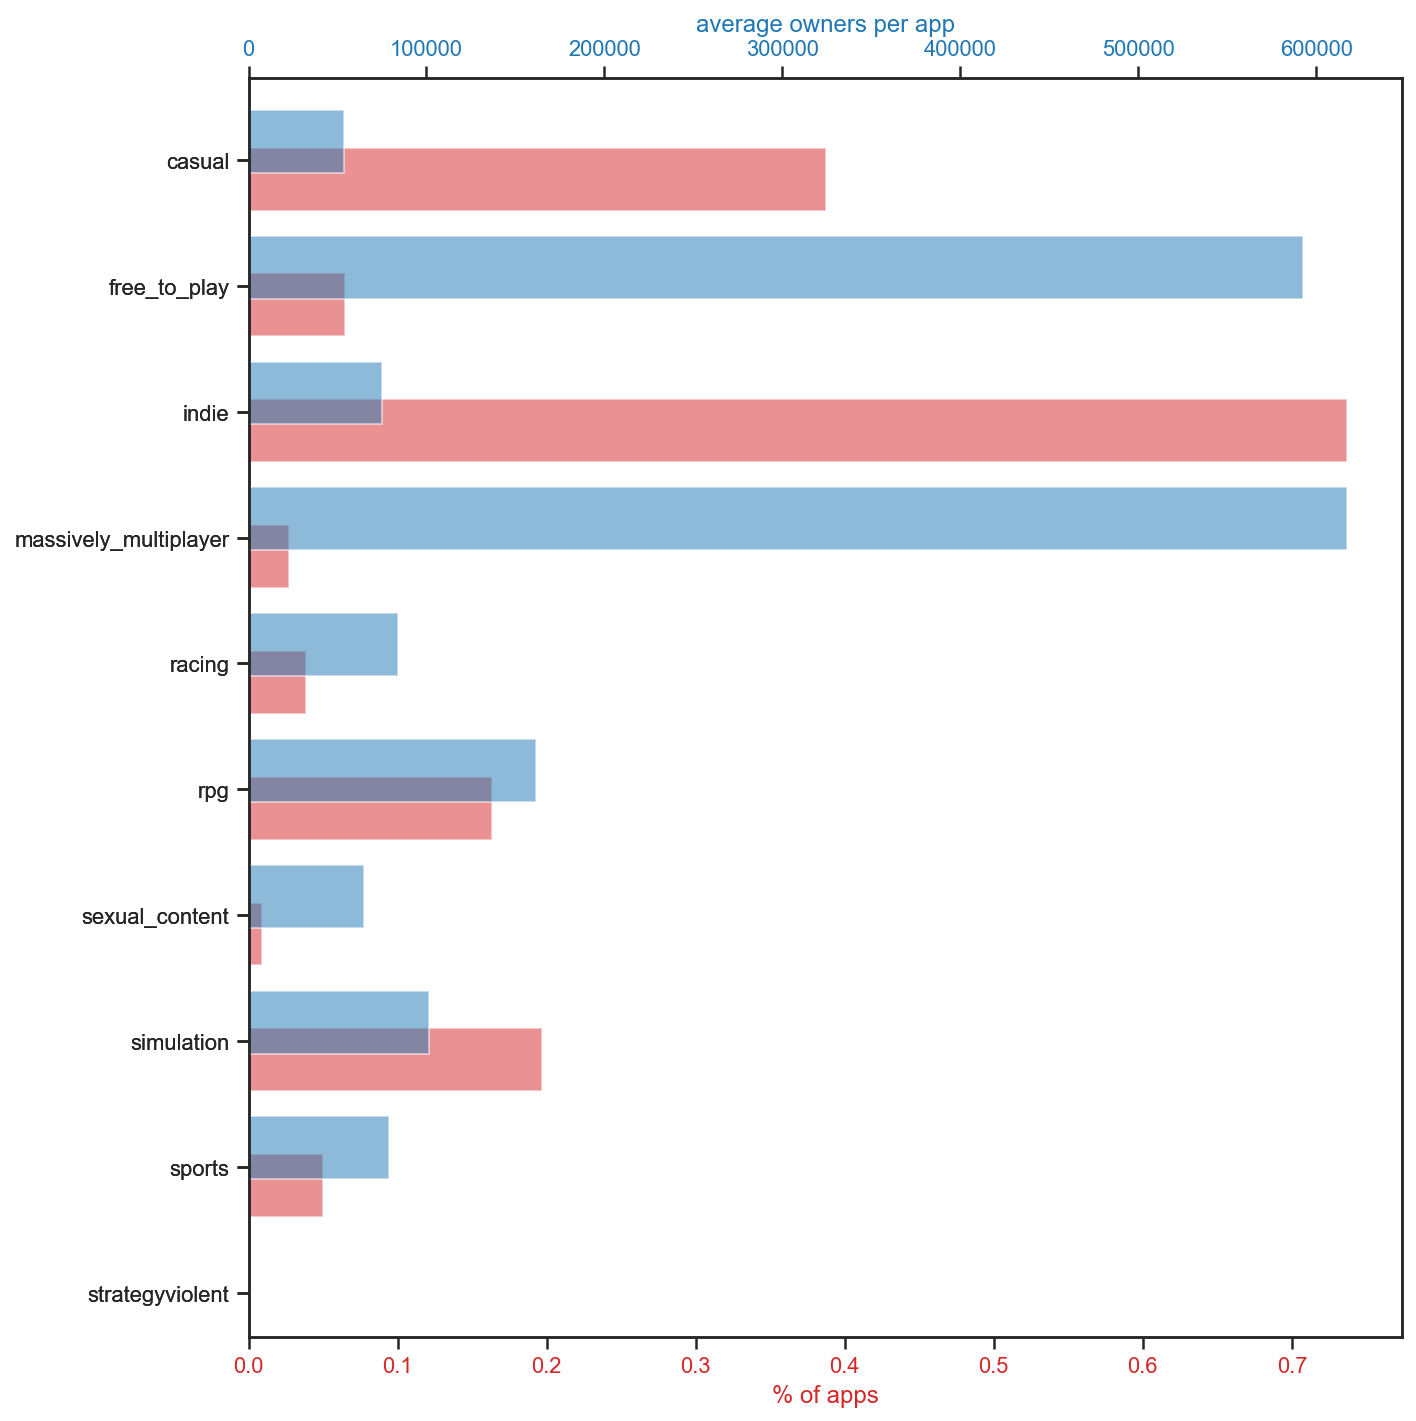

In [15]:
genre_cols = data.columns[-10:]

total_owners_per_genre = data[genre_cols].multiply(data['owners'], axis='index').sum()
average_owners_per_genre = total_owners_per_genre / data[genre_cols].sum()

fig, ax1 = plt.subplots()

color = 'tab:red'
data[genre_cols].mean().sort_index(ascending=False).plot.barh(ax=ax1, color=color, alpha=.5, position=.8)

ax1.set_xlabel('% of apps', color=color)
ax1.tick_params(axis='x', labelcolor=color)

ax2 = ax1.twiny()

color = 'tab:blue'
average_owners_per_genre.sort_index(ascending=False).plot.barh(ax=ax2, color=color, alpha=.5, position=.2, label='1', figsize=[10, 10])
ax2.set_xlabel('average owners per app', color=color)
ax2.tick_params(axis='x', labelcolor=color)

plt.tight_layout()
plt.show()

Можем видеть, что по количеству игроков преобладает 2 жанра:
    - Free-to-Play
    - Massive Multiplayer
    
А по количеству игр:
    - Indie
    - Casual

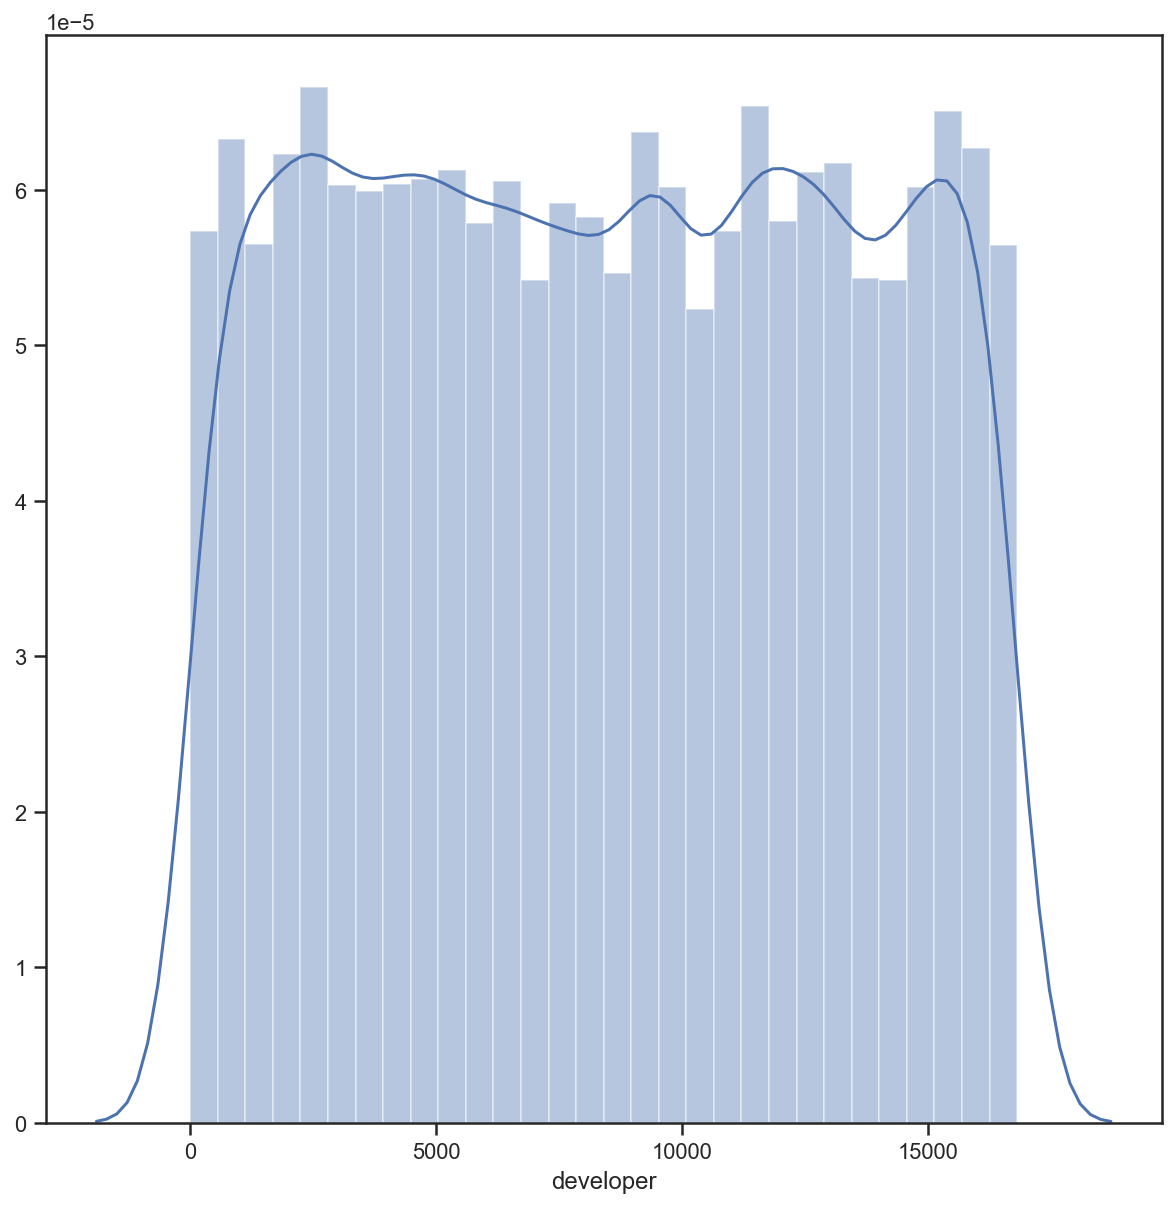

In [16]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['developer'])

По гистограмме можно сказать, что у разработчиков в среднем примерно одинаковое количество игр.

### Выведем график корреляции

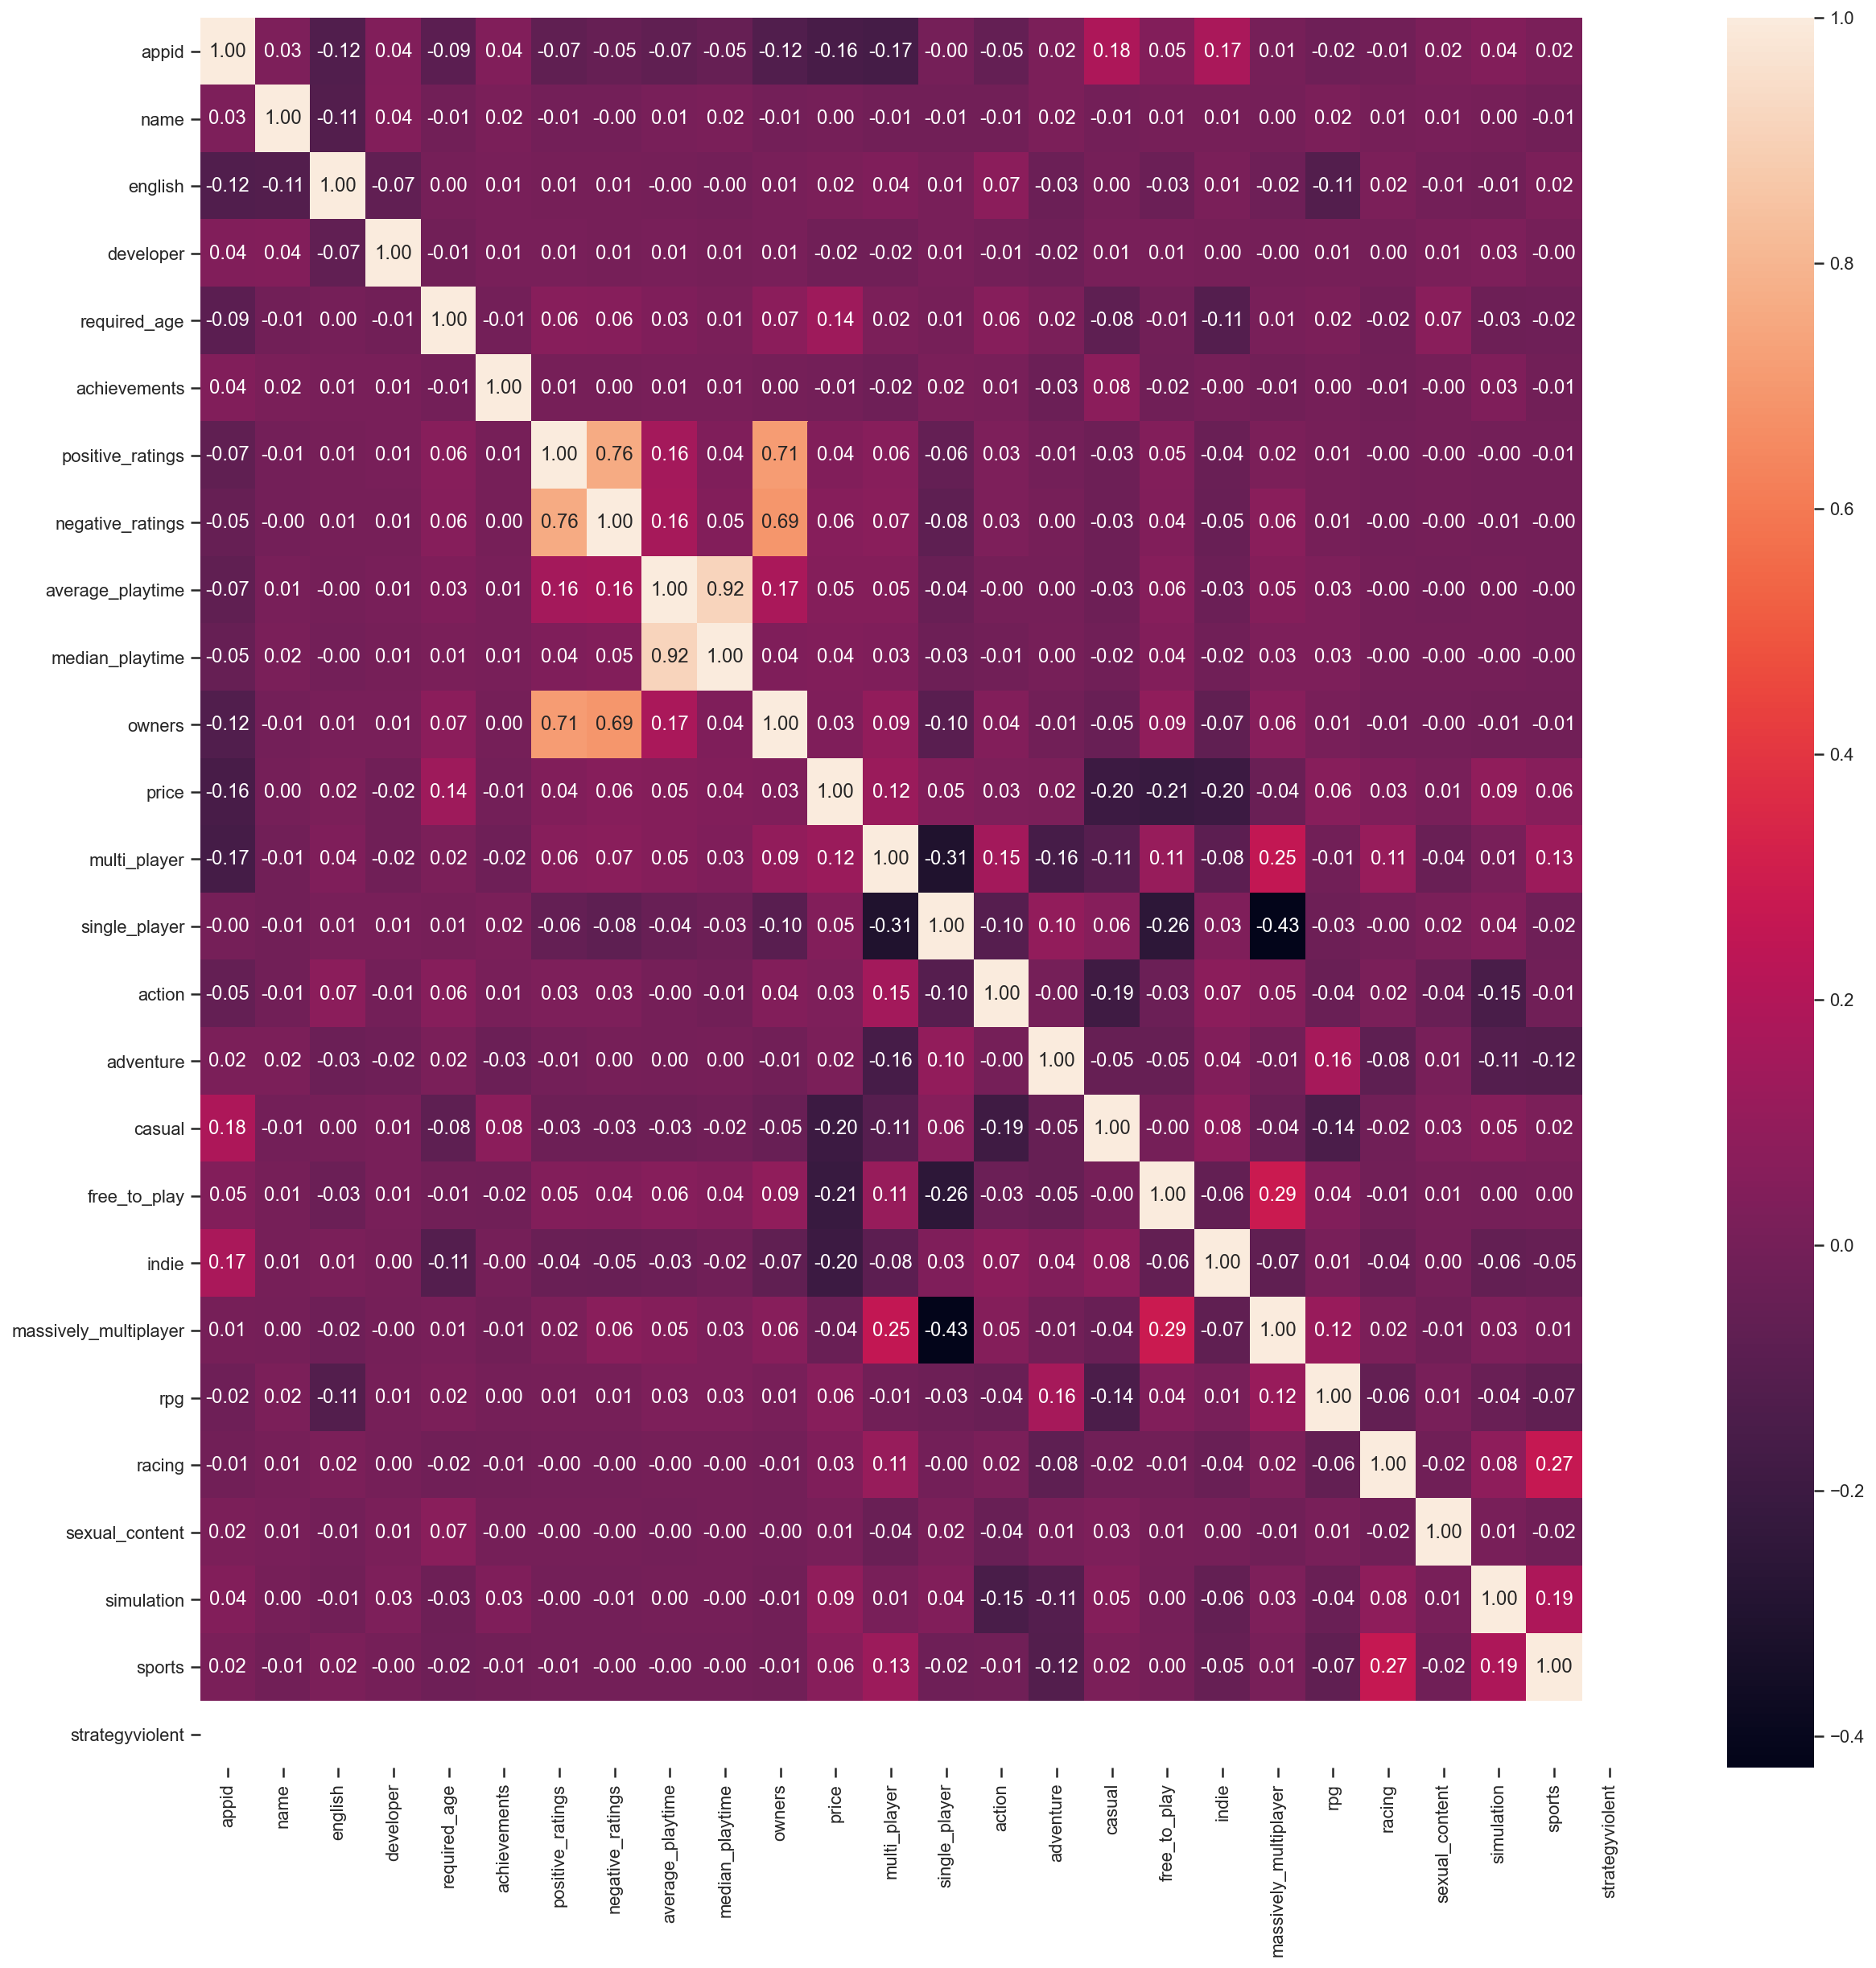

In [17]:
plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt='.2f')

Можем увидеть что есть корреляция между:

    - Price и Required Age завист друг от друга
    - Среднее время игровой сессии завсит от оценок(positive/negative ratings)
    - Количесто игроков зависит от отзывов (positive/negative ratings)
    - Прямая корреляция между 2 жанрами: MMO и Free-To-Play

Наш целевой признак multi_player:

    - Убирем не коллериющуие признаки: appid, developer, achivments, single_player, adventure 

### Метрики

In [18]:
# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label=1, average='micro'):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
        """
        Добавление значения
        """
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        """
        Формирование данных с фильтром по метрике
        """
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        """
        Вывод графика
        """
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

### Формирование обучающей и тестовой выборки

In [20]:
data.columns

Index(['appid', 'name', 'release_date', 'english', 'developer',
       'publisher', 'platforms', 'required_age', 'achievements',
       'positive_ratings', 'negative_ratings', 'average_playtime',
       'median_playtime', 'owners', 'price', 'multi_player',
       'single_player', 'action', 'adventure', 'casual',
       'free_to_play', 'indie', 'massively_multiplayer', 'rpg',
       'racing', 'sexual_content', 'simulation', 'sports',
       'strategyviolent'],
      dtype='object')

In [21]:
class_cols = ['english', 'required_age',
       'positive_ratings', 'negative_ratings', 'average_playtime',
       'median_playtime', 'owners', 'price', 'action', 'casual',
       'free_to_play', 'indie', 'massively_multiplayer', 'rpg',
       'racing', 'sexual_content', 'simulation', 'sports',
       'strategyviolent']

In [22]:
X = data[class_cols]
y = data['multi_player']

X.shape

(26358, 19)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [25]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", y_train.shape)
print("Y_test:", y_test.shape)

X_train: (19768, 19)
X_test: (6590, 19)
Y_train: (19768,)
Y_test: (6590,)


### Построение базового решения (baseline) для выбранных моделей без подбора гиперпараметров

In [26]:
models = {'KNN_3':KNeighborsClassifier(n_neighbors=3),
          'SVC':SVC(),
          'Tree':DecisionTreeClassifier(),
          'RF':RandomForestClassifier(),
          'GB':GradientBoostingClassifier()}

In [27]:
metricLogger = MetricLogger()

In [28]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('accuracy', model_name, accuracy)
    metricLogger.add('roc_auc', model_name, roc_auc)
    
    print('*****************************************************')
    print(model)
    print("accuracy:", accuracy)
    print("recall:", recall)
    print("precision:", precision)
    print("roc_auc:", roc_auc)
    print('*****************************************************')
    draw_roc_curve(y_test, y_pred)
    
    plot_confusion_matrix(model, X_test, y_test, 
                      display_labels=['0','1'], 
                      cmap=plt.cm.Blues, normalize='true')
    plt.show()

*****************************************************
KNeighborsClassifier(n_neighbors=3)
accuracy: 0.8251896813353566
recall: 0.1446673706441394
precision: 0.2860125260960334
roc_auc: 0.5420306550190395
*****************************************************


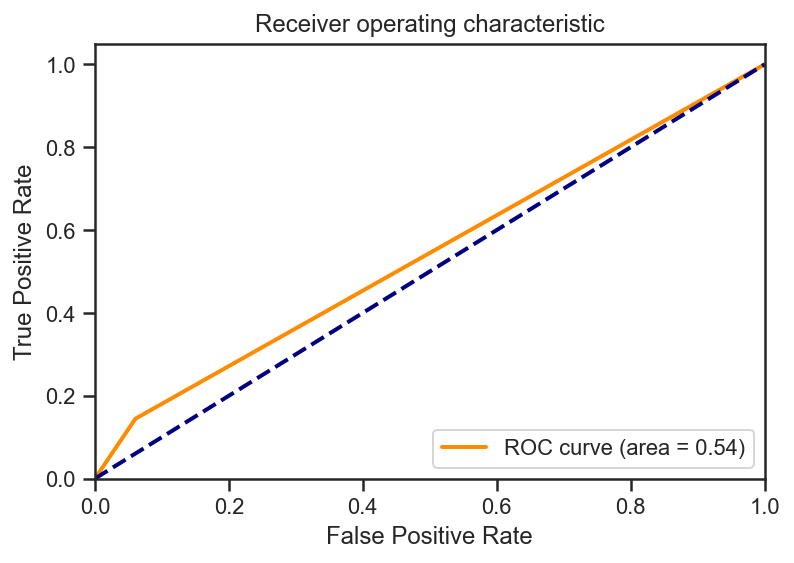

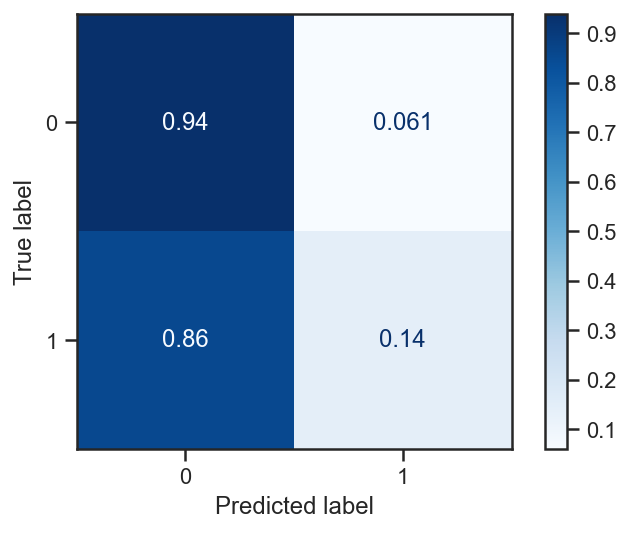

*****************************************************
SVC()
accuracy: 0.8569044006069803
recall: 0.009503695881731784
precision: 0.6428571428571429
roc_auc: 0.5043088211820497
*****************************************************


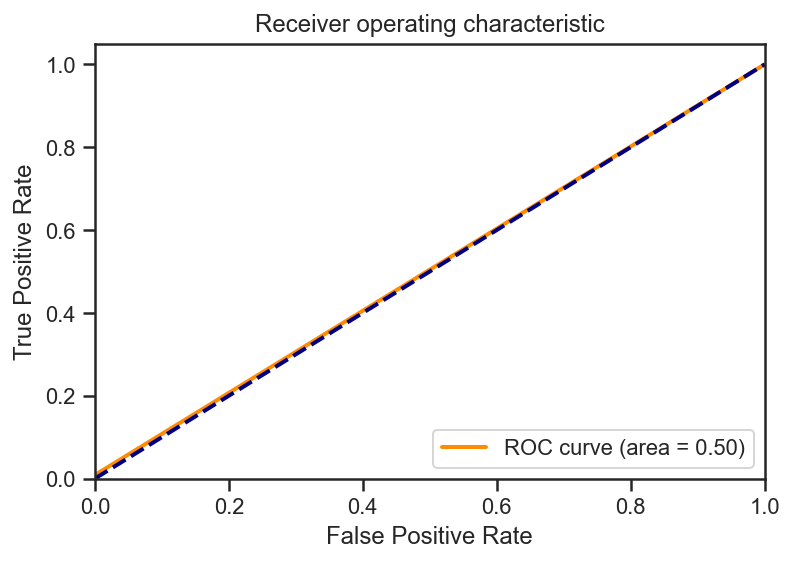

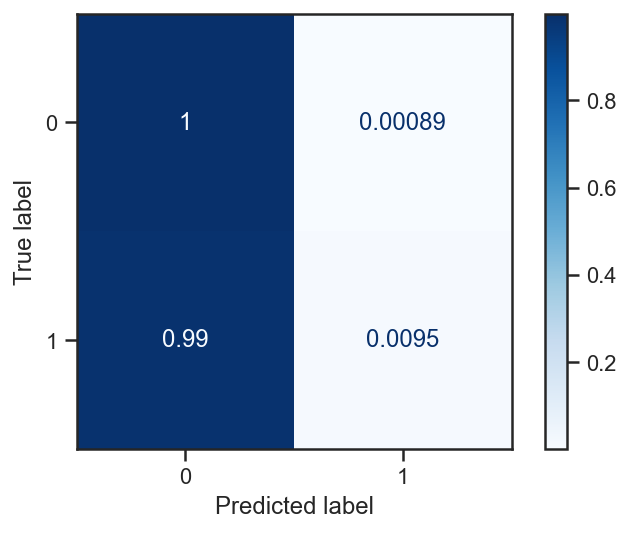

*****************************************************
DecisionTreeClassifier()
accuracy: 0.7980273141122913
recall: 0.32840549102428723
precision: 0.3091451292246521
roc_auc: 0.6026220260366874
*****************************************************


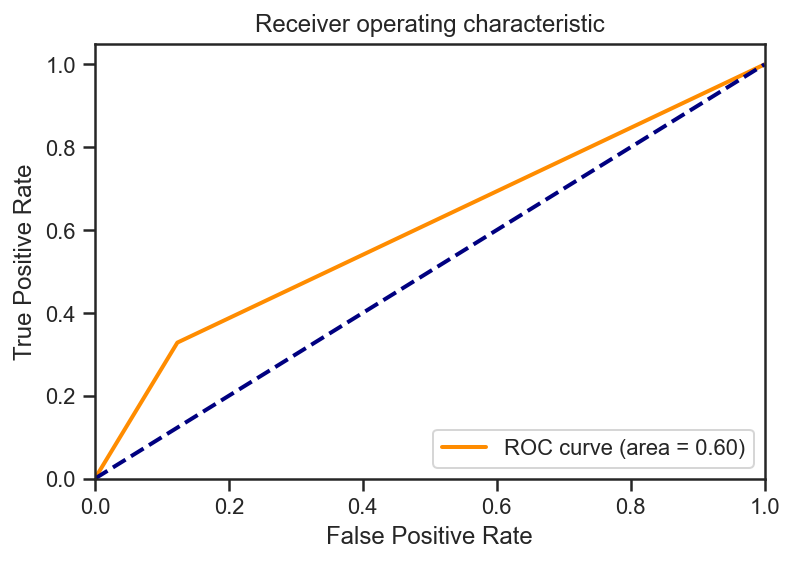

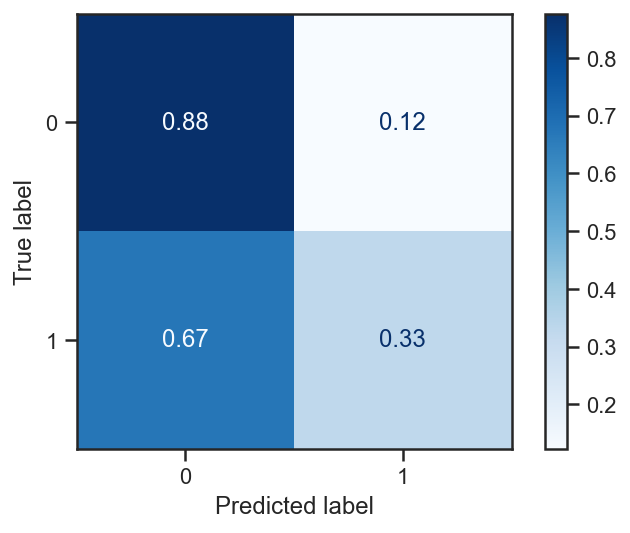

*****************************************************
RandomForestClassifier()
accuracy: 0.8572078907435509
recall: 0.22703273495248152
precision: 0.5070754716981132
roc_auc: 0.5949978489577222
*****************************************************


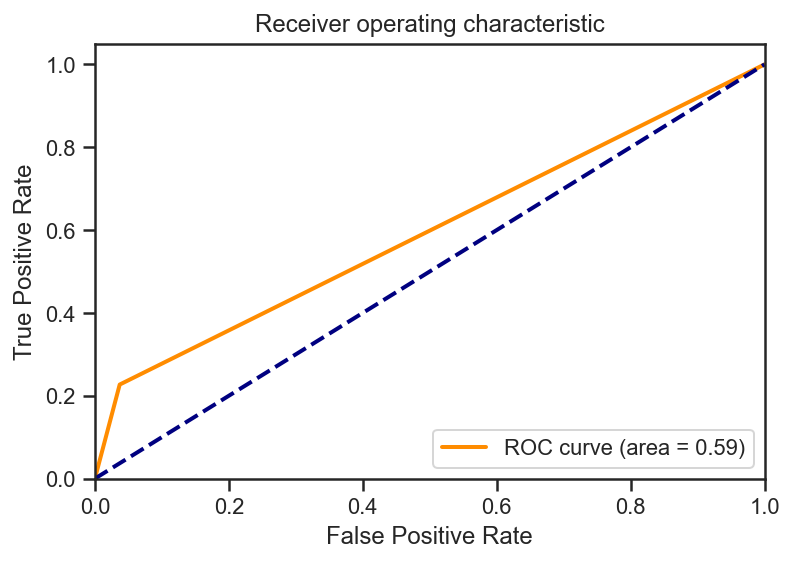

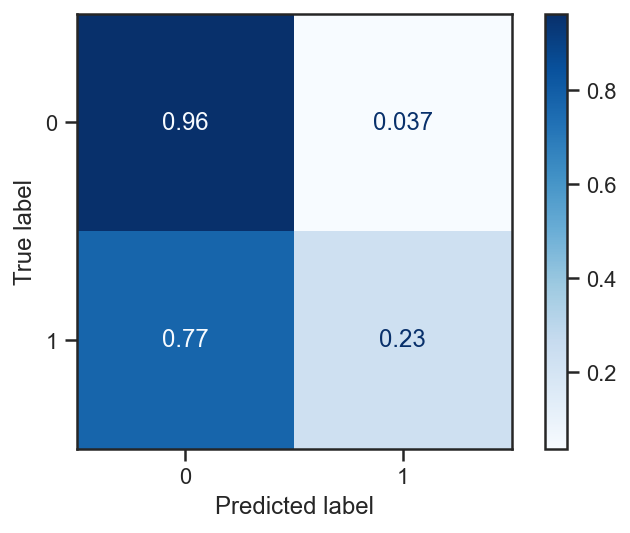

*****************************************************
GradientBoostingClassifier()
accuracy: 0.870257966616085
recall: 0.20274551214361142
precision: 0.6575342465753424
roc_auc: 0.5925122208954811
*****************************************************


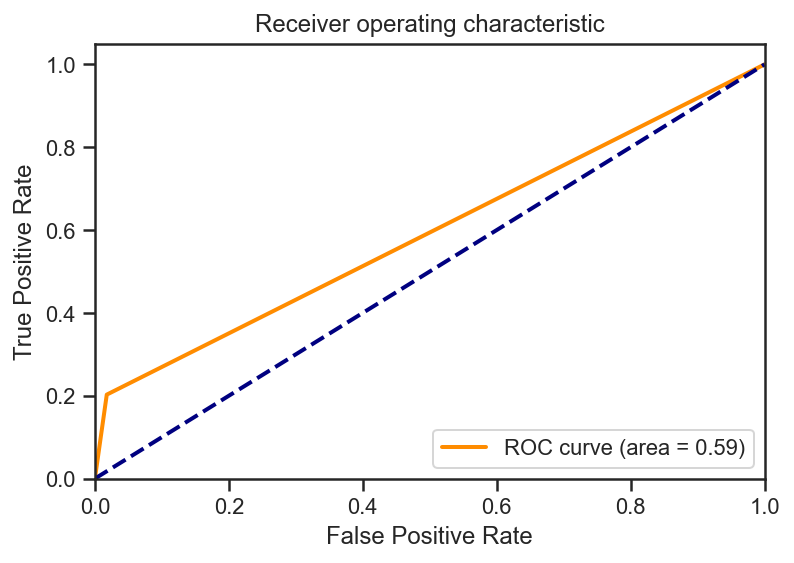

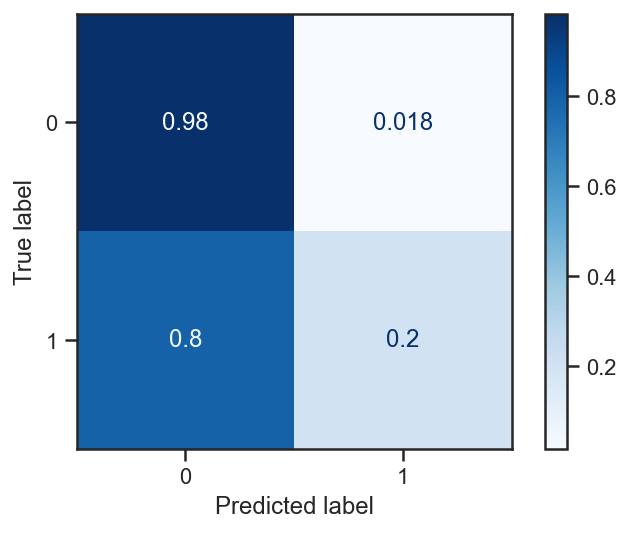

In [29]:
for model_name, model in models.items():
    test_model(model_name, model, metricLogger)

### Подбор гиперпараметров

In [30]:
n_range = np.array(range(0,30,1))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}]

In [31]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy', n_jobs = -1)
clf_gs.fit(X, y)

CPU times: user 1.57 s, sys: 207 ms, total: 1.78 s
Wall time: 1min 39s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}],
             scoring='accuracy')

In [32]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=28)

In [33]:
clf_gs.best_params_

{'n_neighbors': 28}

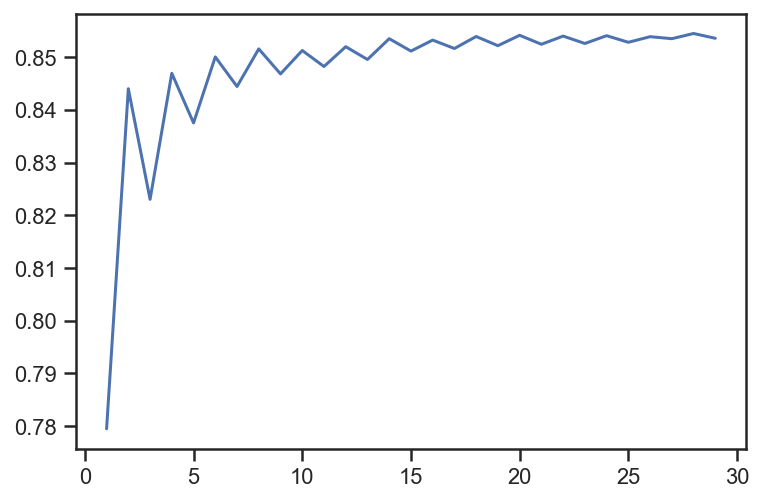

In [34]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [35]:
tree_param = {'criterion':['gini','entropy'], 'splitter': ['best', 'random'], 'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150, 1000]}

clf_gs = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
clf_gs.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150, 1000],
                         'splitter': ['best', 'random']})

In [36]:
clf_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=8, splitter='random')

In [37]:
clf_gs.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'random'}

### Сравнение качества полученных моделей с качеством baseline-моделей.

*****************************************************
KNeighborsClassifier(n_neighbors=28)
accuracy: 0.8599393019726859
recall: 0.06335797254487856
precision: 0.625
roc_auc: 0.5284891936089624
*****************************************************


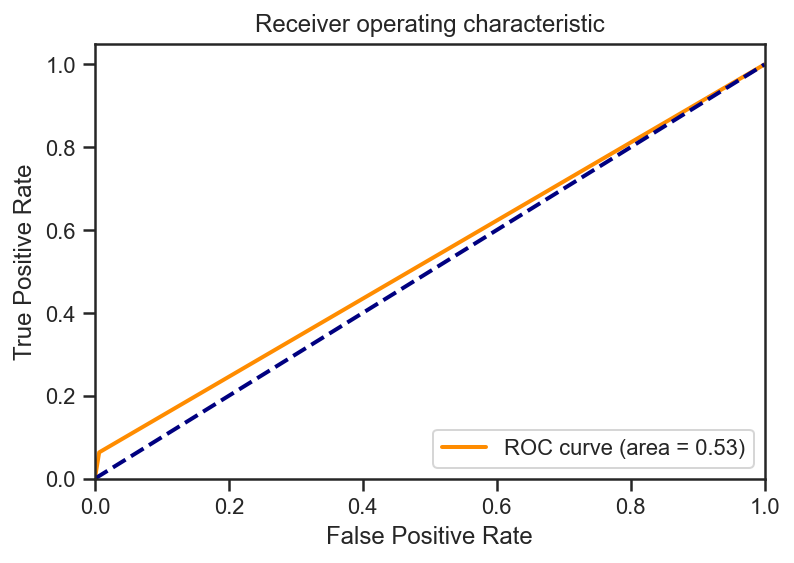

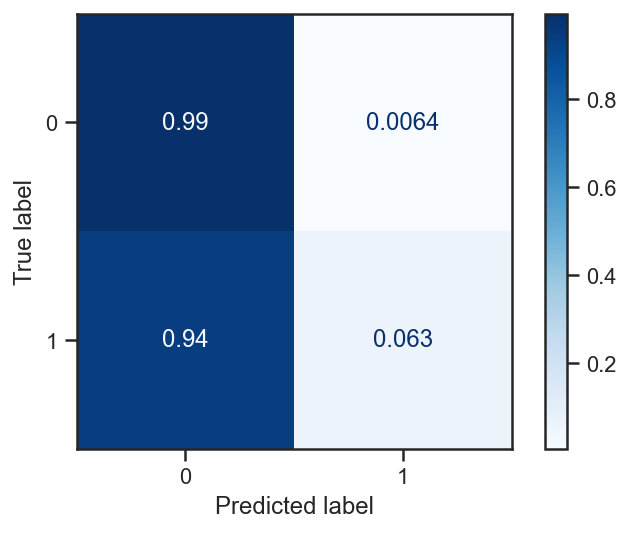

In [40]:
test_model('KNN_5', KNeighborsClassifier(n_neighbors=28), metricLogger)

*****************************************************
DecisionTreeClassifier(max_depth=4)
accuracy: 0.866464339908953
recall: 0.1457233368532207
precision: 0.6602870813397129
roc_auc: 0.5665706884514199
*****************************************************


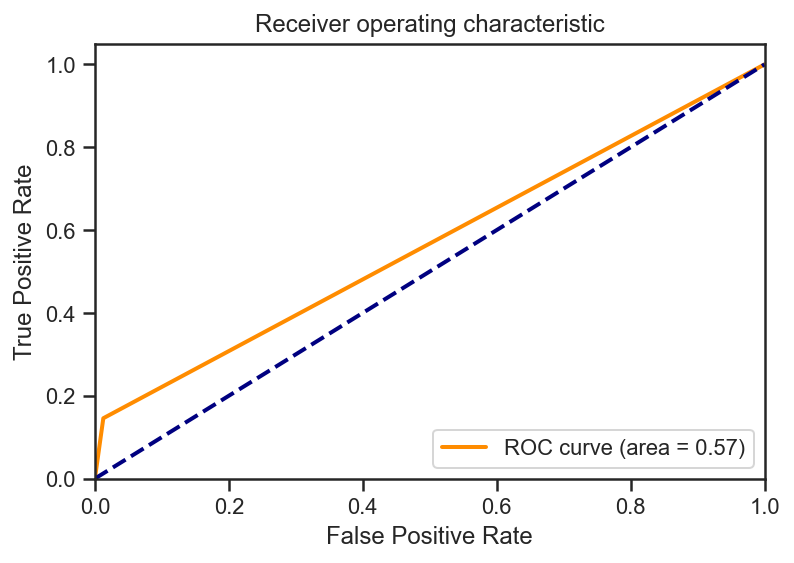

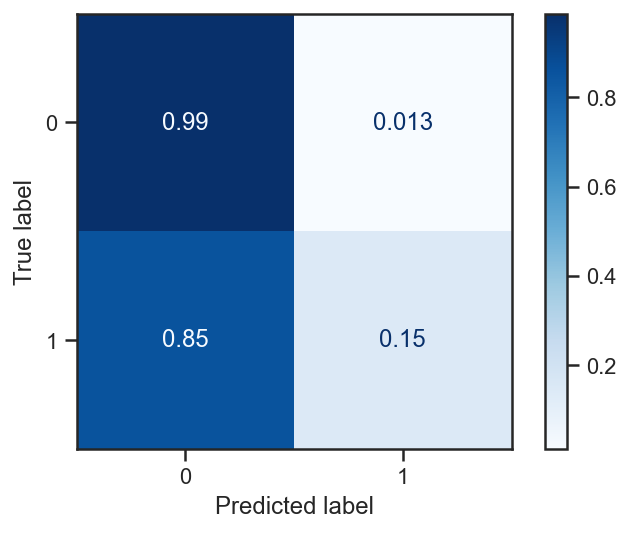

In [41]:
test_model('Tree_4', DecisionTreeClassifier(criterion='gini', max_depth=4), metricLogger)

*****************************************************
DecisionTreeClassifier(max_depth=7)
accuracy: 0.8670713201820941
recall: 0.18796198521647306
precision: 0.624561403508772
roc_auc: 0.5845002199695692
*****************************************************


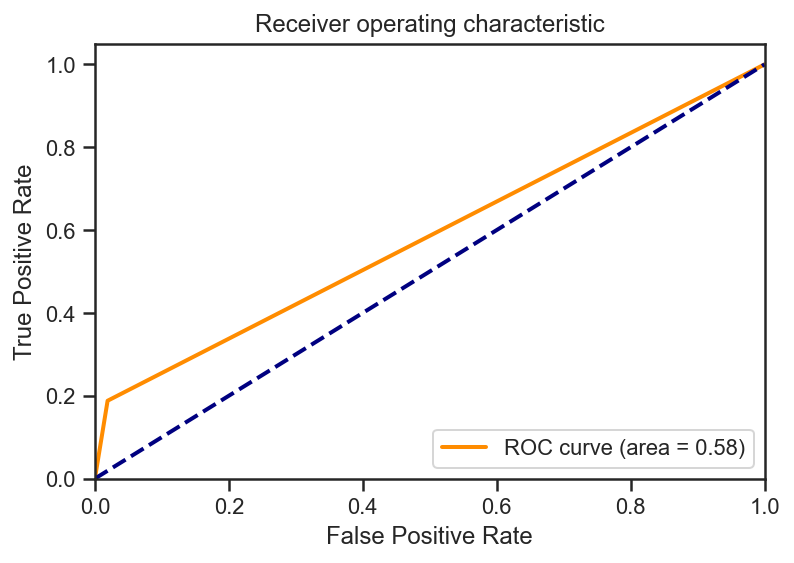

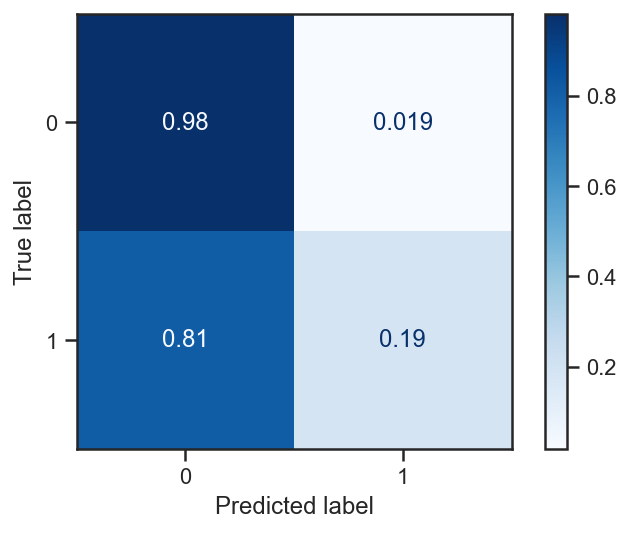

In [42]:
test_model('Tree_7', DecisionTreeClassifier(criterion='gini', max_depth=7, splitter='best'), metricLogger)

### Формирование выводов о качестве построенных моделей на основе выбранных метрик. Результаты сравнения качества рекомендуется отобразить в виде графиков и сделать выводы в форме текстового описания. 

In [43]:
metrics = metricLogger.df['metric'].unique()
metrics

array(['precision', 'recall', 'accuracy', 'roc_auc'], dtype=object)

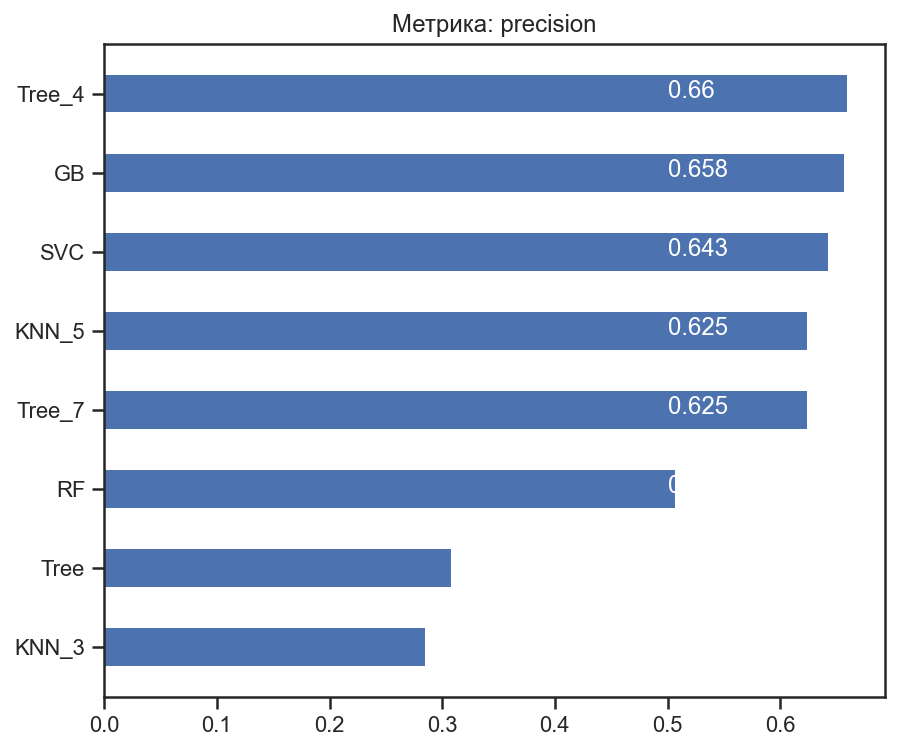

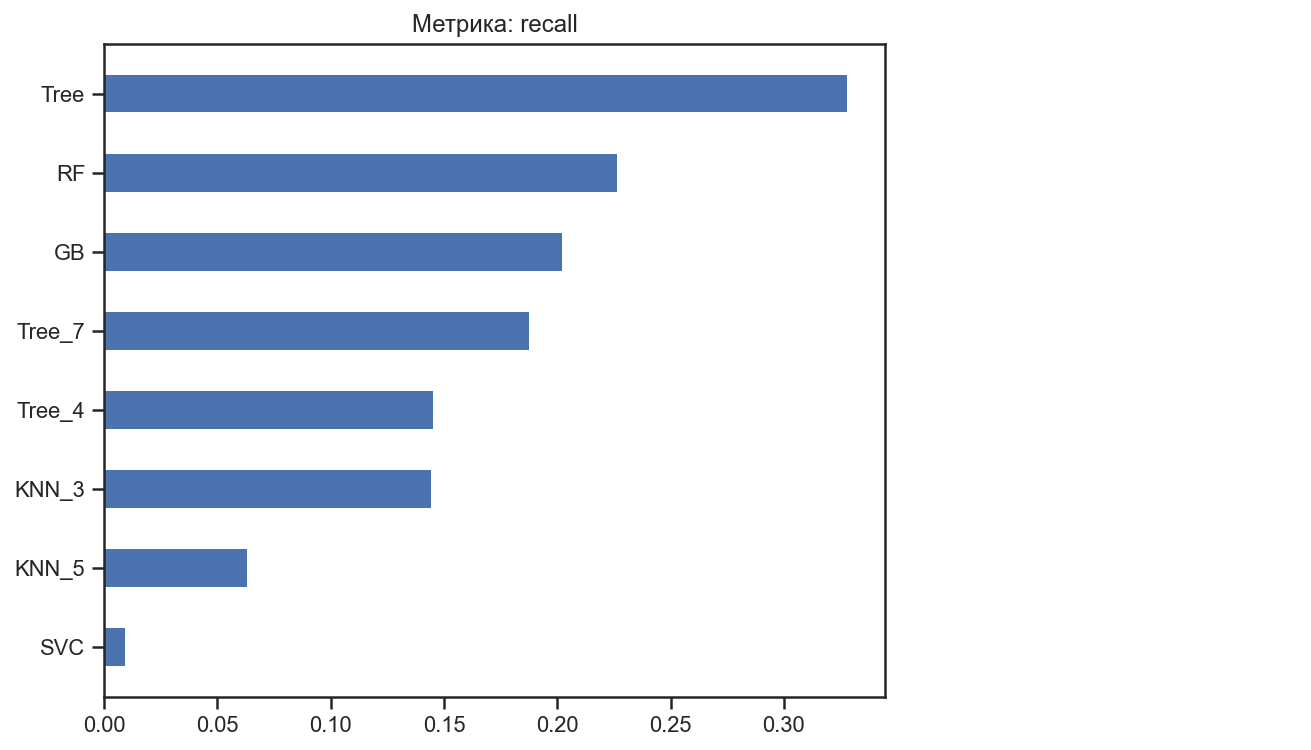

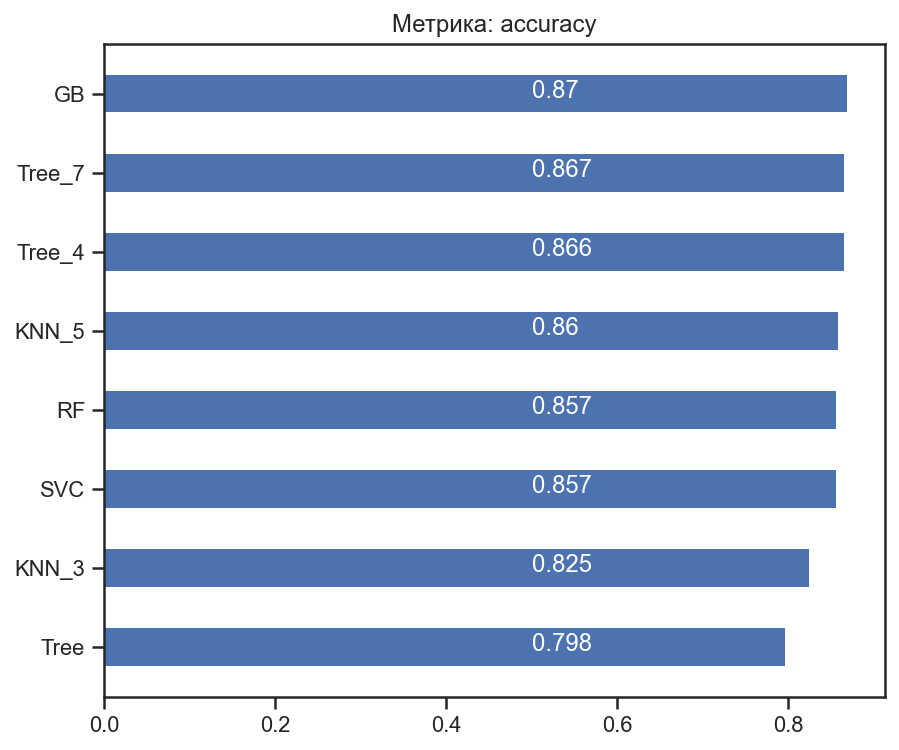

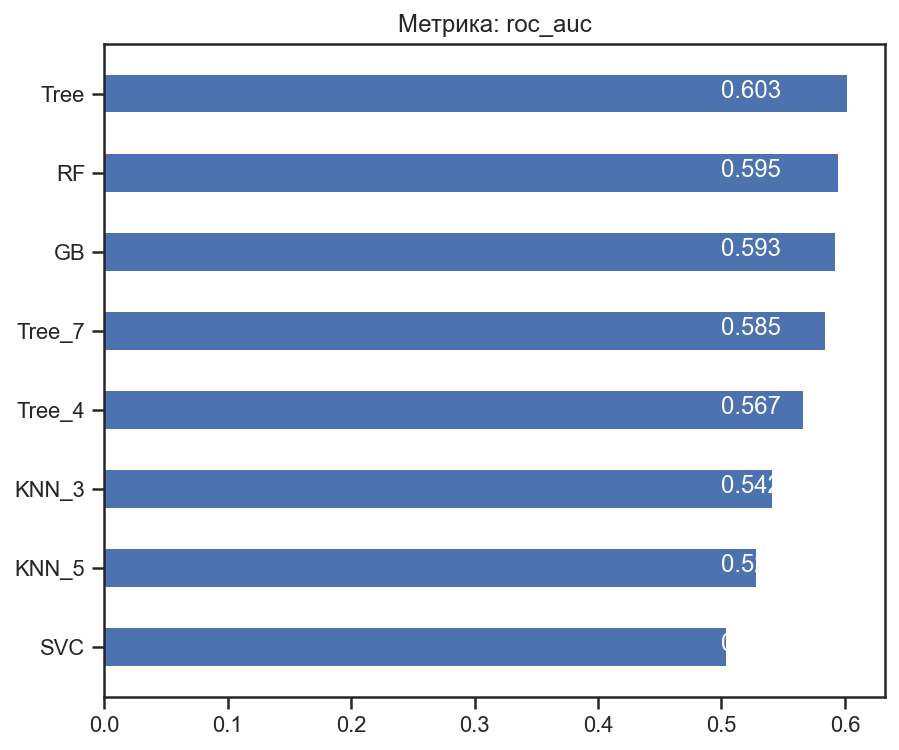

In [44]:
for metric in metrics:
    metricLogger.plot('Метрика: ' + metric, metric, figsize=(7, 6))

# Вывод:
Было использовано 5 моделей, для двух из них был проведен подбор гиперпараметров(Decision Tree и KNN). Для подбора гиперпараметров модели Gradient Boosting  не хватило вычислительной мощности компьютеров. Лучше всего себя показала модель Decision Tree, модель GB не сильно от нее отстала, а в некоторых показателях оказалась даже лучше. Можем сделать предположение, что при правильном подборе гиперпараметров, модель GB оказалось бы лучшей из приведенных.